# Double Slit Experiment

Kristian Feliz

## Introduction

Contrary to what one might assume, light behaves as both a wave and a particle. What this means is that the photons composing light will still be in discrete quantities, typical of a particle, but will still interfer with itself, which is behavior exclusive to waves. 

In this notebook, I will be using data I collected manuallying in the course *Experiments in Physics* (PHYS-315) at RIT, to tackle and ultimately prove wave-particle duality. Although, the problem at hand is important, it's well established. Instead, the main purpose of this notebook is to serve as a small sample of my experience in data analytics. 

As typical of data analytics problems, after understanding the problem at hand and it's importance to stakeholders (in this case, the foundations of quantum physics), comes the stages of data. I'll begin by describing what data would be needed to solve this problem (even though it's already been collected) to help guide through the process. Also, some data in the two txt files are commented out. The process of cleaning the data has been done manually as well, though in a problem which may have thousands or hundreds thousands entries, the process would be done in a programming language such as python. The specific data that has been neglated is data that is known to be poor, since the data was taken manually, with manual knob turning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy.optimize as opt;

An ideal double slit has an intensity that follows Fraunhofer's double slit theory, described by the equation
$$
I(\theta) = I_0 \left(\cos(\beta)\right)^2\left(\frac{\sin(\alpha)}{\alpha}\right)^2
$$
where 
$$ \alpha = \frac{\pi a}{\lambda}\sin{\theta} $$
and
$$ \beta = \frac{\pi d}{\lambda}\sin{\theta}. $$
In other words, assuming the data describes an ideal double slit, it should, hopefully, follow the equation.

## Wave-Like property

In [2]:
wavelength = 670e-9 # Wavelength of red laser, 670 nm, in m

# The ideal double slit interference pattern
# Takes inputs: 
#  theta: The angle displacement away from straight
#  a: The slit width of each slit in the apparatus of the double slit experiment
#  d: The spacing between the slits
#  G: In the equation it's I_0, the maximum intensity
#  H: Will be used in the regression to account for any "noise", i.e. background voltage or miscallibration of apparatus or measuring device.
#     Represented as a verticle offset.    
#
# Returns: The value computed from the function
# Important note: All values should be floats or doubles

def double_slit_pattern(theta,a,d,c,G,H,lmbd = wavelength):    
    alpha = (np.pi * a * np.sin(theta - c))/lmbd
    beta = (np.pi * d * np.sin(theta - c))/lmbd
    return G*((np.cos(beta))**2 ) * ((np.sin(alpha)/alpha)**2) + H

The data will be loaded in from *DoubleSlitData.txt* and a scatter plot will be created from an initial visualization of the data. Within the file, the displacement angle, in degrees and the measured voltage are space seperated. Since it was hand recorded in a txt file, np.loadtxt was used, but the pandas library could also be used if it were a CSV (it even works for txt files as well!)  

(0.004, 0.016)

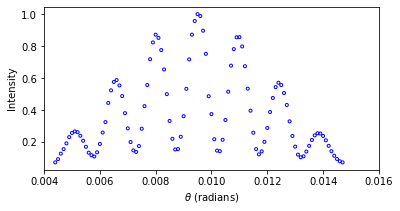

In [16]:
L = 500 #mm, length of apparatus 
voltage_max = 0.841
displacement, voltage = np.loadtxt('DoubleSlitData.txt' ,unpack=True)

theta = displacement/L
voltage_adjusted = voltage/voltage_max

DoubleSlitScatter = plt.figure(figsize = (6,3))
plt.scatter(theta,voltage_adjusted,marker =".",label = "Data",edgecolors = 'blue',facecolors
= 'none')
plt.ylabel("Intensity")
plt.xlabel("$\\theta$ (radians)")
plt.xlim(0.004,0.0160)

Now, in order to obtain the parameters just from the data, regression will be run using SciPy's optimize library, which will fit a curve to the data using non-linear least  squares. 

In [4]:
# These perimeter's are guesses, roughly what they should be considering the apparatus 
# and data, but as shown later on, are off. 
a = 8.69e-5
d = 4.52e-4
c = 9.49598506e-03
G = 1
H = 0

# These are the errors. Since the data was manually collected there exist some error plus
# the error in measurements 
displacement_error = 0.02
voltage_error = 0.005
theta_error = displacement_error/L

a = 0.00010211528168603543, d = 0.0004506843480518583, c = 0.00949605024329725, I_0 = 0.9111903858145265, H = 0.11520106741347759


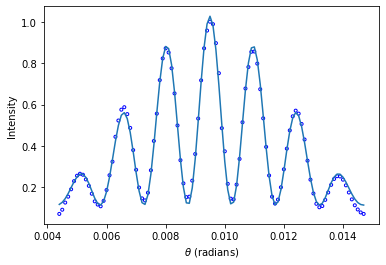

In [18]:
# Regression using a standard deviation calculated from the errors
sigma = np.sqrt(voltage_error**2 + theta_error **2)*np.ones(len(theta)) #<-- So that the Sigma variable is an array with length equal to the datasets.

parameters, covariance = opt.curve_fit(double_slit_pattern,theta,voltage_adjusted,
                                       p0 = [a,d,c,G,H],sigma = sigma)
plt.scatter(theta,voltage_adjusted,marker =".",label = "Data",edgecolors = 'blue',facecolors
= 'none')
plt.plot(theta,double_slit_pattern(theta,*parameters))
print("a = {0}, d = {1}, c = {2}, I_0 = {3}, H = {4}".format(*parameters))
plt.ylabel("Intensity")
plt.xlabel("$\\theta$ (radians)")
plt.show()

This result demonstrates that light does indeed behave as a wave, but also give an excellent measure of the apparatus' slit width and slit seperation of the double slit.  This result will be used in the demonstration of the particle nature of light.

## Particle-Like Property

For this case, instead of measuring the voltage of the laser, a photomultiplier tube (PMT) was used, which can detect the counts of individual photons from a low intensity green blub with a wavelength of roughly ~550 nm. The results of this measurement is stored in *BlubDoubleSlit.txt*.

In [19]:
a,d,c,G,H = parameters
a_error, d_error, c_error, G_error, H_error = np.sqrt(np.diag(covariance))
displacement_angle, counts = np.loadtxt('BlubDoubleSlit.txt' ,unpack=True)
theta = displacement_angle/L

intensity = counts/2104

initial_wave = 550e-9
initial_c = 0.00671

In [20]:
# The same as double_slit_pattern() but now using the pre defined global variables

def double_slit_pattern2(theta,c2, G2,H2,lmbd):
    alpha = (np.pi * a * np.sin(theta - c2))/lmbd
    beta = (np.pi * d * np.sin(theta - c2))/lmbd
    return G2 * ((np.cos(beta))**2 ) * ((np.sin(alpha)/alpha)**2) + H2

c = 0.006717011328487434, I_0 = 0.9036058214525443, H = 0.13256581695771813, 
Wavelength = 5.61599956374221e-07

Wavelength Error = 1.3473074309749419e-09


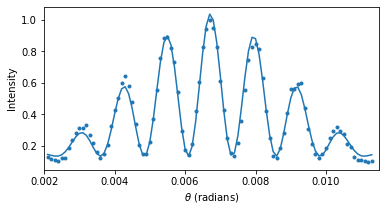

In [21]:

sigma = np.ones(len(theta)) * np.sqrt(d_error**2 + a_error**2 + c_error **2 + theta_error **2) # The standard deviations calculated.

plt.figure(figsize=(6,3))
plt.tight_layout()
plt.scatter(theta,intensity,marker = '.',label = "data")
plt.ylabel("Intensity")
plt.xlabel("$\\theta$ (radians)")

parameters2, covariance2 = opt.curve_fit(double_slit_pattern2,theta, intensity,p0 = [initial_c,G,H,initial_wave],sigma=sigma)
plt.plot(theta,double_slit_pattern2(theta,*parameters2),label = "$\lambda$ = " + str(round(parameters[0],10)))
plt.xlim(0.002,0.0115)
print("c = {0}, I_0 = {1}, H = {2}, \nWavelength = {3}\n".format(*parameters2))
print("Wavelength Error = {}".format(np.sqrt(np.diag(covariance2))[-1]))

Our initial guess of 550 nm was off by roughly 11 nm, but using the slit width and seperation found in the first half, and fitting a curve soley for the vertical and horizontal offset and center intensity, we were able to find the wavelength which is well within the range of green light.

Just from the scatter plots, it was clear that both the laser and the discrete counts of photons from the green blub follow the distribution of an double slit. This is an exciting find, since even though the green blub measured counts of a few photons, roughly on the scale of a few hundred, it would still interfer with itself. This can be imagined classically as shooting a few balls through one of two gates and instead of passing straight through one, it would interfer, either constructively or destructively, with it's own wavelength, causing it to sometimes end in the middle or to a far end.   